### Linear Regression

#### Pikat kyçe
* Logjika e modelit
* Kalkulimi i gabimeve
* Algoritmet optimizuese/kalkulimi i koeficientëve
* Trajnimi i modelit
* Testimi i modelit
* Evaluimi i performancës së modelit

#### Logjika e modelit

Ky model është një ndër modelet më të thjeshta të supervised learning për regression functions. Linear regression përdoret në fusha të ndryshme për të parashikuar një vlerë numerike në bazë të disa vlerave hyrëse. Ky parashikim bëhet duke përdorur një funksion linear që kalkulon vlerën dalëse që supozohet që ndryshon së bashku me ndryshimin e vlerave hyrëse. Funksioni në fjalë zakonisht shprehet si:

$$
\hat{y} = \beta_{0} + \beta_{1} x_{1} + \cdots + \beta_{p} x_{p} = x^{\top} \beta
$$

ku:
$\hat{y}$: vlera e parashikuar nga modeli

$x_{i}$: vlera hyrëse

$β_{i}$: koeficienti që modeli përcakton gjatë trajnimit (sa është pesha e secilës vlerë hyrëse)

$β_{0}$: intercepti që ka funksioni kur ai nuk pranon asnjë vlerë hyrëse

Të shprehur në formë vektoriale:

$\hat{y}$​=$x^⊤$β

ku x=[1, $x_{1}$, ⋯, $x_{p}$]$^T$ dhe β=[$β_{0}$, $β_{1}$, ⋯, $β_{p}$]$^T$


Qëllimi kryesor i këtij modeli është përcaktimi i $β_{i}$ ashtu që $\hat{y}$ është sa më e përafërt me vlerën e vërtetë të ${y}$.

Coefficient (weight of x): 63.33158840398794
Intercept:  -0.7729584534834183

Evaluation on test set:
MSE : 208.414328011833
RMSE: 14.43656219505991
R^2 : 0.9420579709881898


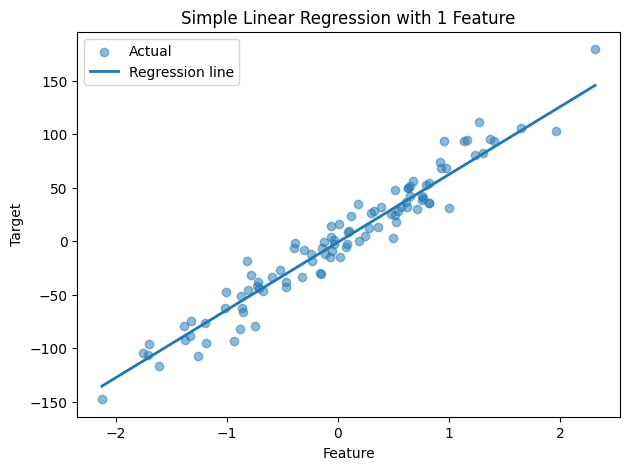

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate dataset
X, y = make_regression(
    n_samples=500,
    n_features=1,
    noise=15.0,
    random_state=42
)

df = pd.DataFrame({"feature": X.ravel(), "target":y})

df.head()

X = df[["feature"]]
y = df["target"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Inspect parameters
print("Coefficient (weight of x):", lin_reg.coef_[0])
print("Intercept: ", lin_reg.intercept_)

# Predict & evaluate
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation on test set:")
print("MSE :", mse)
print("RMSE:", rmse)
print("R^2 :", r2)

results = pd.DataFrame({
    "y_true": y_test.values,
    "y_pred": y_pred
}).reset_index(drop=True)

results.head()

results["residuals"] = results["y_true"] - results["y_pred"]
results.head()

plt.figure(figsize=(7, 5))

plt.scatter(X_test, y_test, alpha=0.5, label="Actual")

sorted_idx = np.argsort(X_test.values.ravel())
X_sorted = X_test.values.ravel()[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

plt.plot(X_sorted, y_pred_sorted, linewidth=2, label="Regression line")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Simple Linear Regression with 1 Feature")
plt.legend()
plt.show()

#### Kalkulimi i gabimeve

Parashikim më i saktë vjen me një funksion me parametra/koeficientë më të qëlluar. Ky është edhe qëllimi i këtij modeli, kalkulimi i parametrave më optimal. Gjatw trajnimit, Linear Regression fillon me kalkulimin e gabimit mes vlerës së parashikuar dhe asaj të vërtetë, dhe pastaj vazhdon me pwrdorimin e algoritmeve optimizuese pwr tw pwrcaktuar kowficientw qw e ulin atw gabim. Implementimi paraprak përdor algoritmin Ordinary Least Squares (OLS). Fillimisht ky algoritwm pwrdor njw lloj tw Loss Functions, i njohur si Sum of Squared Error (SSE):

$$
L( β_{i}, β_{0} ) = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 
       = \sum_{i=1}^{N} \left( y_i - (β_{i} x_i + β_{0}) \right)^2
$$

Nw Loss Functions zakonisht pwrdoret katrori i diferencave pwr dy arsyje: 1. kwshtu diferencat e mwdhaja kanw mw shumw peshw nw pwrmisimin e caktimit tw koeficientwve, 2. vlerat negative nuk e ndikojnw gabimisht rezultatin. SSE paraqet shumwn e gjithw gabimeve, pra gabimin absolut dhe pwrdoret kryesisht nga OLS.

Verzion tjetwr i Loss Function qw ka pwrdorim tw gjerw si nw algoritme optimizuese, ashtu edhe nw evaluim tw perfomancws sw modelve tw regresionit wshtw edhe Mean Squared Error (MSE):

$$
\text{MSE}( β_{i}, β_{0} ) = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - (β_{i} x_i + β_{0}) \right)^2
$$

MSE, nw anwn tjetwr shpreh gabimin mesatar tw modelit, duke mos u afektuar nga madhwsia e dataset-it. Kwshtu, ky funksion hyn nw punw edhe nw krahasimin e punws sw disa modelve, ose trajnimit nw disa dataset-e tw ndryshme. Poashtu, ky funksion gjen pwrdorim edhe nga algoritmi optimizues, Gradient Descent.


Custom SSE: 20841.4328011833
Custom MSE: 208.414328011833
sklearn MSE: 208.414328011833


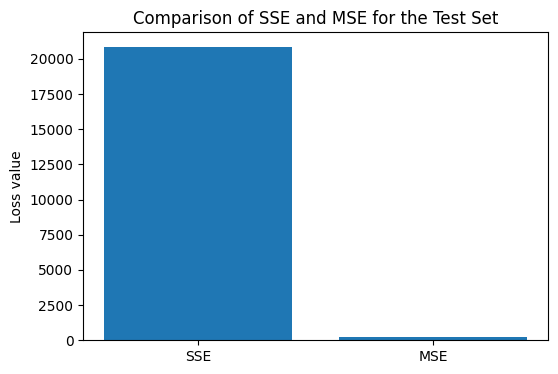

In [6]:
from loss_functions.sse_loss import sse
from loss_functions.mse_loss import mse

y_true = np.asarray(y_test)
y_hat = np.asarray(y_pred)

sse_res = sse(y_test, y_pred)
mse_res = mse(y_test, y_pred)

print("Custom SSE:", sse_res)
print("Custom MSE:", mse_res)

print("sklearn MSE:", mean_squared_error(y_true, y_hat))

residuals = y_true - y_hat

plt.figure(figsize=(6, 4))
plt.bar(["SSE", "MSE"], [sse_res, mse_res])
plt.title("Comparison of SSE and MSE for the Test Set")
plt.ylabel("Loss value")
plt.show()
